<a href="https://colab.research.google.com/github/seph0916/seph-solo-machine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A08%EB%8B%A8%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망을 사용한 이미지 분류

In [1]:
# keras 합성곱 층.
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3),activation='relu')

In [2]:
# 패션 데이터 불러오기 및 적절한 전처리
# train_scaled의 차원 을 (50000,28,28)에서 (50000,28,28,1)로 바뀜.
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target)=\
keras.datasets.fashion_mnist.load_data()
train_scaled=train_input.reshape(-1,28,28,1)/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 합성곱 신경망 만들기
# Sequential class 만든뒤 Conv2D 추가. + add() 를 사용해 층 하나씩 추가
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',
                              padding='same',input_shape=(28,28,1)))

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
# 합성곱-풀링 층 다음 두번째 합성곱-풀링 층 추가 해보기. 필터개수만 64개로 늘림 이외 변동 x
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
# 3차원 feature map을 일렬로 펼치기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

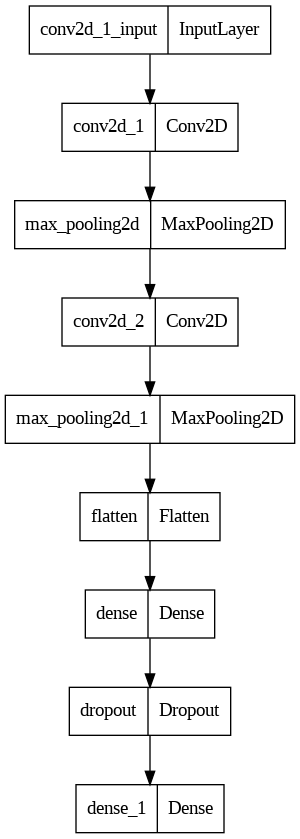

In [8]:
keras.utils.plot_model(model)

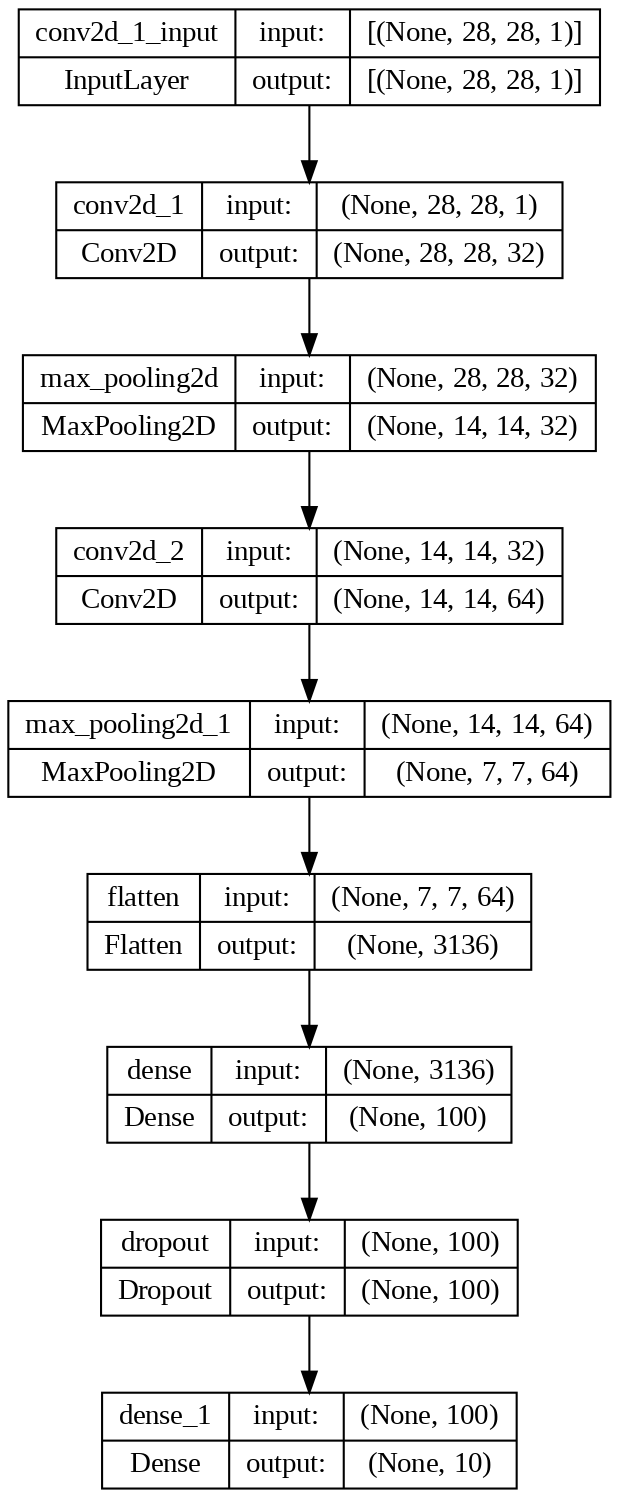

In [9]:
keras.utils.plot_model(model,show_shapes=True,
                       to_file='cnn-architecture.png',dpi=150)

In [10]:
# 모델 컴파일 및 훈련
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,
                                                restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,
                  validation_data=(val_scaled,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 85s 54ms/step - loss: 0.5312 - accuracy: 0.8091 - val_loss: 0.3425 - val_accuracy: 0.8762
Epoch 2/20
1320/1500 [=========================>....] - ETA: 8s - loss: 0.3542 - accuracy: 0.8724

KeyboardInterrupt: ignored

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

NameError: ignored

In [12]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 6s 16ms/step - loss: 0.2812 - accuracy: 0.8976


[0.2811904847621918, 0.8975833058357239]

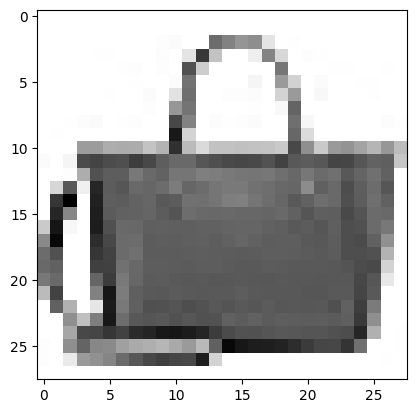

In [14]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [15]:
preds=model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 108ms/step
[[2.7450800e-10 4.9794690e-16 1.9313348e-10 3.5839332e-11 3.4049227e-10
  1.6821033e-10 1.7408366e-10 5.5899658e-09 1.0000000e+00 2.0966241e-10]]


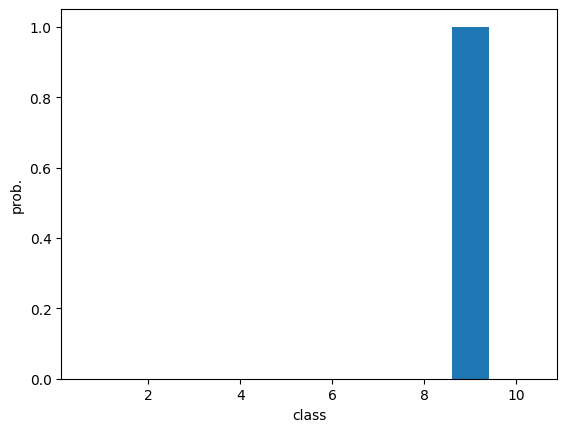

In [16]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [17]:
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

In [ ]:
test_scaled=test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

# 합성곱 신경망의 시각화

In [19]:
# 2절에서 만든 모델이 어떤 가중치를 학습했는지 확인.
from tensorflow import keras
model=keras.models.load_model('best-cnn-model.h5')

In [20]:
model.layers

In [21]:
conv=model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [22]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

0.0029093048 0.13911736


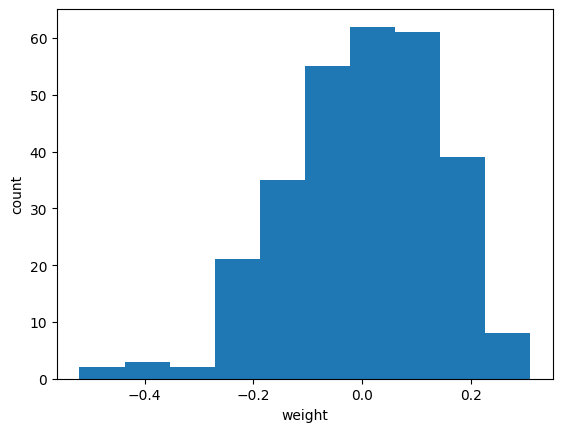

In [23]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

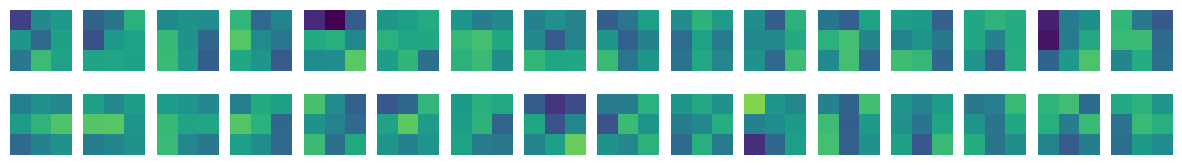

In [24]:
# 32개의 커널을 16개씩 두줄에 출력.
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [25]:
no_training_model=keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation=\
                                          'relu',padding='same',input_shape=(28,28,1)))

In [26]:
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [27]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std())

-0.0060699102 0.08372697


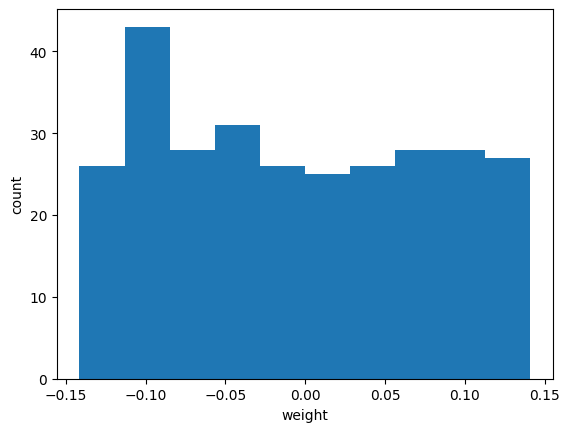

In [28]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

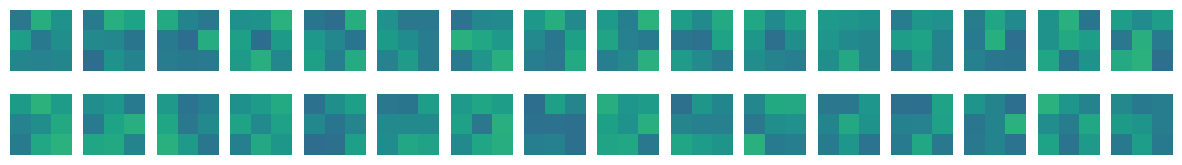

In [29]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [30]:
# 함수형 API
# 입력이 2개 혹은 출력이 2개일수도있는 경우에 대비해서 Sequential 클래스를 대체할 함수형 API
dense1=keras.layers.Dense(100,activation='sigmoid')
dense2=keras.layers.Dense(10,activation='softmax')

In [33]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_1_input'), name='conv2d_1_input', description="created by layer 'conv2d_1_input'")


In [34]:
conv_acti=keras.Model(model.input,model.layers[0].output)

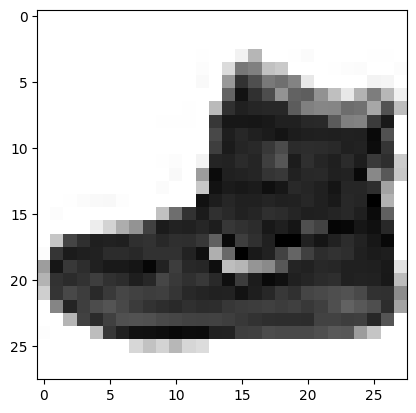

In [35]:
(train_input,train_target),(test_input,test_target)=\
keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [36]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv_acti.predict(inputs)

1/1 [==============================] - 0s 65ms/step


In [38]:
print(feature_maps.shape)

(1, 28, 28, 32)


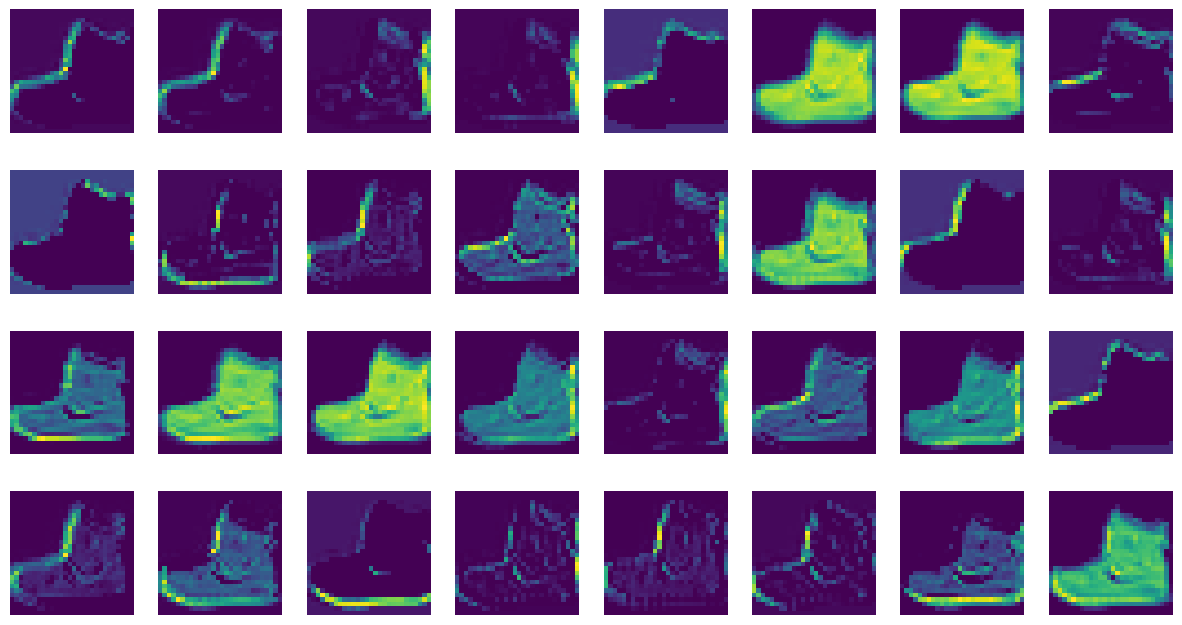

In [39]:
fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [40]:
conv2_acti=keras.Model(model.input,model.layers[2].output)

In [41]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv2_acti.predict(inputs)

1/1 [==============================] - 0s 72ms/step


In [42]:
print(feature_maps.shape)

(1, 14, 14, 64)


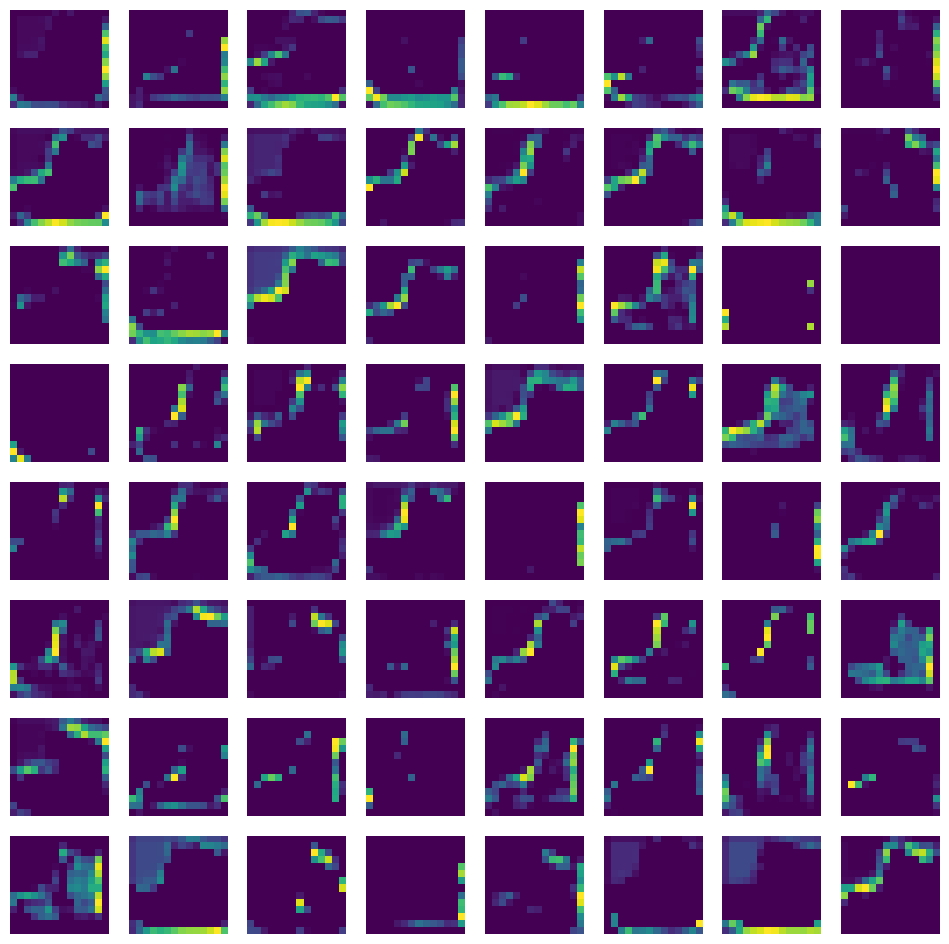

In [43]:
fig,axs=plt.subplots(8,8,figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()